# Visualization of 2019 Bay Wheels Ride
## by Youssef Farahat

## Investigation Overview

> In this investigation, I wanted to look at to the user behaviour characteristics, I focused on weekday, user age, user gender, trip duration, and user type to analyze and understand the usage of bike When, Who, How?


## Dataset Overview

> The forgobike trip data are nearly 180,000 rides that happend in Feburary 2019

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_data.csv')
df.head()

,duration_minute,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_date,weekday,is_weekend
0,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,47.0,Male,Yes,28,Thursday,Weekday
1,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,62.0,Male,No,28,Thursday,Weekday
2,19.116667,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,38.0,Female,No,28,Thursday,Weekday
3,26.916667,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,32.0,Male,No,28,Thursday,Weekday
4,26.166667,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,33.0,Other,No,28,Thursday,Weekday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The average trip duration was around 12 minutes yet there are trips above 100 which led to making the plot unreadable.  

> So we should do data transformation to make it easier to read and interpret the data. Below are the plots before/after data transformation.

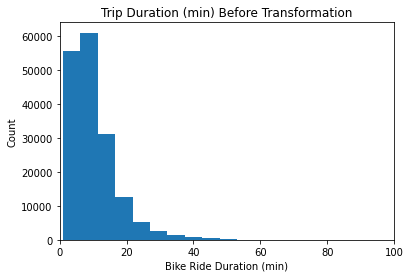

In [5]:
plt.hist(data = df, x = 'duration_minute');
plt.xlim(0, 100);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Trip Duration (min) Before Transformation");

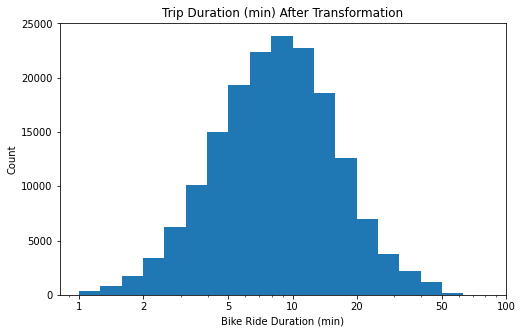

In [6]:
bins = 10 ** np.arange(0, np.log10(df['duration_minute'].max())+0.1, 0.1)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel("Bike Ride Duration (min)");
plt.ylabel("Count");
plt.title("Trip Duration (min) After Transformation");

## (Visualization 2)

> Based on our data we have three gender male, female and other. In the next visualization I will show the number of bike rides for each day based on gender

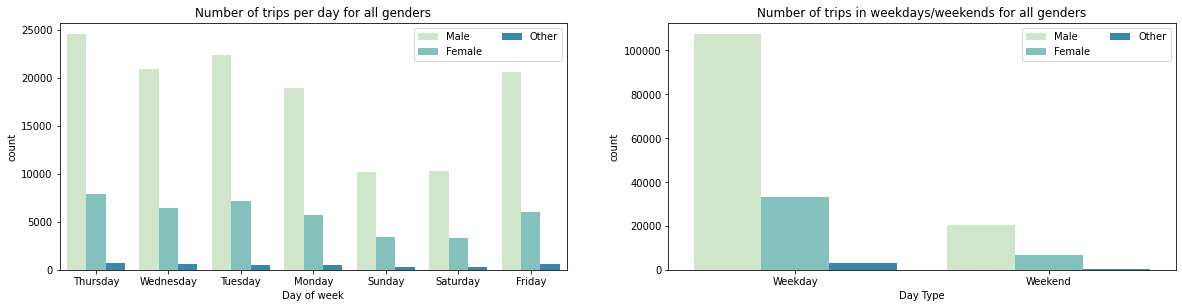

In [12]:
plt.figure(figsize = [20, 10]);

ax = plt.subplot(2, 2, 1);
sb.countplot(data = df, x = 'weekday', hue = 'member_gender', palette = 'GnBu');
ax.legend(loc = 1, ncol = 2);
ax.set_xlabel('Day of week')
plt.title('Number of trips per day for all genders')

ax = plt.subplot(2, 2, 2);
sb.countplot(data = df, x = 'is_weekend', hue = 'member_gender', palette = 'GnBu');
ax.legend(ncol = 2);
ax.set_xlabel('Day Type')
plt.title('Number of trips in weekdays/weekends for all genders');


## (Visualization 3)

Based on our data we have two user types. Subscriber, Customer. In the next visualization I will show the number of bike rides for each day based on type

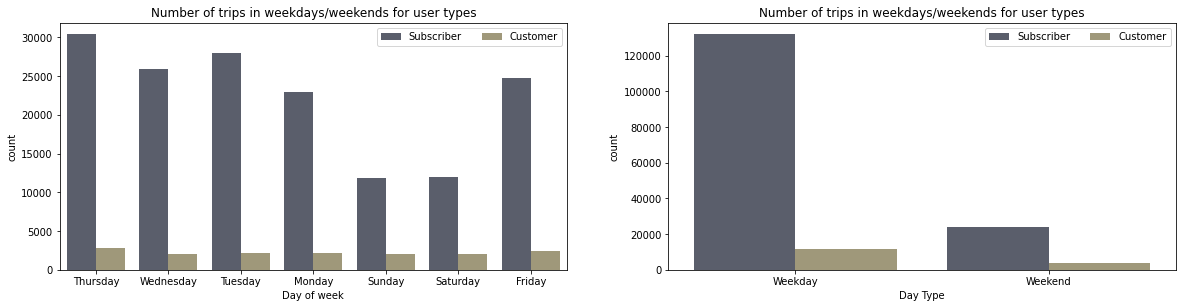

In [13]:
plt.figure(figsize = [20, 10]);

ax = plt.subplot(2, 2, 1)
sb.countplot(data = df, x = 'weekday', hue = 'user_type', palette = 'cividis')
ax.legend(loc = 1, ncol = 2)
ax.set_xlabel('Day of week')
plt.title('Number of trips in weekdays/weekends for user types');

ax = plt.subplot(2, 2, 2)
sb.countplot(data = df, x = 'is_weekend', hue = 'user_type', palette = 'cividis');
ax.legend(loc = 1, ncol = 2)
ax.set_xlabel('Day Type')
plt.title('Number of trips in weekdays/weekends for user types');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!